## Packages

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn.tree import export_graphviz, plot_tree
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC, SVC

## Decision trees

Ressources:

https://scikit-learn.org/stable/modules/tree.html

https://www.lovelyanalytics.com/2016/08/16/decision-tree-comment-ca-marche/

In [2]:
# Load dataset
iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [3]:
# Train a decision tree with max_depth=2
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

### Visualization: plot_tree

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

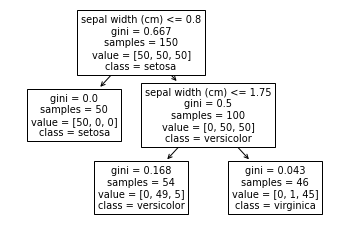

In [5]:
plot = plot_tree(tree_clf, feature_names = iris.feature_names[:2], class_names = iris.target_names)

### Visualization: export_graphviz

In [6]:
from os import system

f = open("iris_tree.dot", 'w')
export_graphviz(tree_clf,out_file=f, class_names=iris.target_names,rounded=True,filled=True)
system("dot -Tpng iris_tree.dot -o iris_tree.png")

0

In [7]:
from PIL import Image
image = Image.open("iris_tree.png")
image.show()

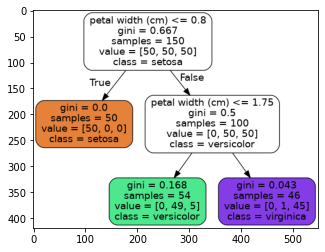

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('iris_tree.png')
imgplot = plt.imshow(img)

Compute the predictions of a decision tree classifier on a test set and calculate all the classification metrics you know:


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.3, stratify=y)

In [10]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [11]:
y_pred=tree_clf.predict(X_test)

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test,y_pred))
print("\nPrecision:\t",metrics.precision_score(y_test,y_pred, average=None))
print("Recall:\t\t",metrics.recall_score(y_test,y_pred, average=None))
print("F1-score:\t",metrics.f1_score(y_test,y_pred, average=None))

Accuracy: 0.9111111111111111

Confusion matrix:
 [[15  0  0]
 [ 0 13  2]
 [ 0  2 13]]

Precision:	 [1.         0.86666667 0.86666667]
Recall:		 [1.         0.86666667 0.86666667]
F1-score:	 [1.         0.86666667 0.86666667]


## Random forests

Ressources:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

In [13]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test,y_pred_rf))
print("\nPrecision:\t",metrics.precision_score(y_test,y_pred_rf, average=None))
print("Recall:\t\t",metrics.recall_score(y_test,y_pred_rf, average=None))
print("F1-score:\t",metrics.f1_score(y_test,y_pred_rf, average=None))

Accuracy: 0.9777777777777777

Confusion matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]

Precision:	 [1.     0.9375 1.    ]
Recall:		 [1.         1.         0.93333333]
F1-score:	 [1.         0.96774194 0.96551724]


## SVM

Ressources: 
https://scikit-learn.org/stable/modules/svm.html
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

In [15]:
# Book example
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 2).astype(np.float64) # Iris-Virginica
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 40, test_size = 0.3, stratify = y)
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])
svm_clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [16]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [17]:
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [18]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("\nConfusion matrix:\n",metrics.confusion_matrix(y_test, y_pred_svm))
print("\nPrecision:\t",metrics.precision_score(y_test, y_pred_svm, average=None))
print("Recall:\t\t",metrics.recall_score(y_test, y_pred_svm, average=None))
print("F1-score:\t",metrics.f1_score(y_test, y_pred_svm, average=None))

Accuracy: 0.9111111111111111

Confusion matrix:
 [[28  2]
 [ 2 13]]

Precision:	 [0.93333333 0.86666667]
Recall:		 [0.93333333 0.86666667]
F1-score:	 [0.93333333 0.86666667]


## Learning curves

### Book example

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

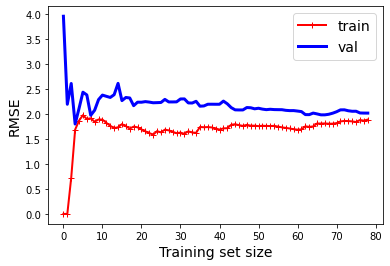

In [20]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)   
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Ressources:  
1.	https://towardsdatascience.com/why-you-should-be-plotting-learning-curves-in-your-next-machine-learning-project-221bae60c53  
2.	https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/  
3.  https://scikit-learn.org/stable/modules/learning_curve.html

In [21]:
def plot_learning_curves(estimator, X_train, y_train, X_val, y_val, training_set_sizes , title=''):
    """
    Plots learning curves for a given estimator.
    Parameters
    ----------
    estimator : sklearn estimator
    X_train : pd.DataFrame
        training set (features)
    y_train : pd.Series
        training set (response)
    X_val : pd.DataFrame
        validation set (features)
    y_val : pd.Series
        validation set (response)
    title: str
        Chart title
    Returns
    -------
    Plot of learning curves
    """
    
    # create lists to store train and validation scores
    train_score = []
    val_score = []

  
    # for each one of those training set sizes
    for i in training_set_sizes:
        # fit the model only using that many training examples
        estimator.fit(X_train[0:i, :], y_train[0:i])
        # calculate the training accuracy only using those training examples
        train_accuracy = metrics.mean_squared_error(
                                    y_train[0:i],
                                    estimator.predict(X_train[0:i, :])
                                    )
        # calculate the validation accuracy using the whole validation set
        val_accuracy = metrics.mean_squared_error(
                                    y_val,
                                    estimator.predict(X_val)
                                    )
        # store the scores in their respective lists
        train_score.append(train_accuracy)
        val_score.append(val_accuracy)
        
    # plot learning curves
    fig, ax = plt.subplots(figsize=(14, 9))
    plt.plot(training_set_sizes, np.sqrt(train_score), "r-+", linewidth=2, label="train")
    plt.plot(training_set_sizes, np.sqrt(val_score), "b-", linewidth=3, label="val")
    
    # format the chart to make it look nice
    ax.set_title(title, size=20)
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)   
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    ax.tick_params(axis='both', labelsize=12)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [23]:
training_set_sizes = np.linspace(2, len(X_train), len(X_train), dtype='int')
training_set_sizes

array([ 2,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

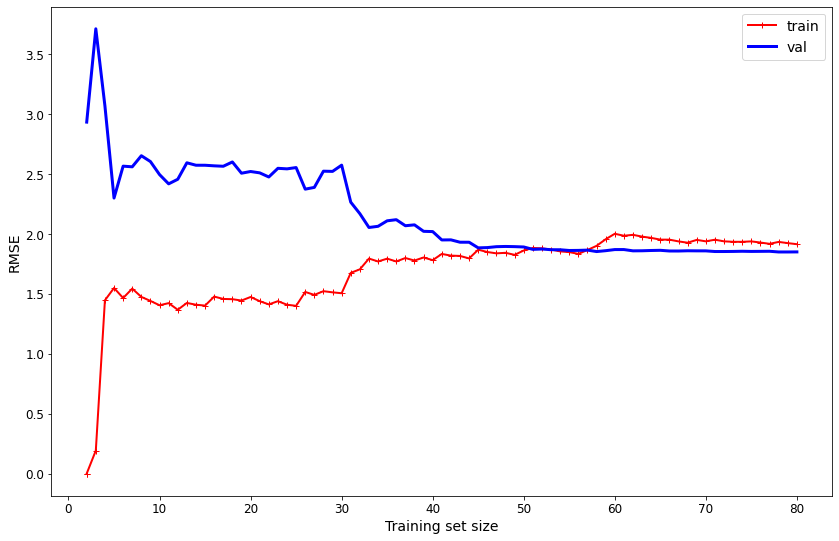

In [24]:
lg = LinearRegression()
plot_learning_curves(lg, X_train, y_train, X_val, y_val, training_set_sizes, title='')

/nix/store/8p73i95k57wcpakj9mxww4410d2548s3-python3-3.10.4-env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:1646: RuntimeWarning: Removed duplicate entries from 'train_sizes'. Number of ticks will be less than the size of 'train_sizes': 46 instead of 50.
  warnings.warn(


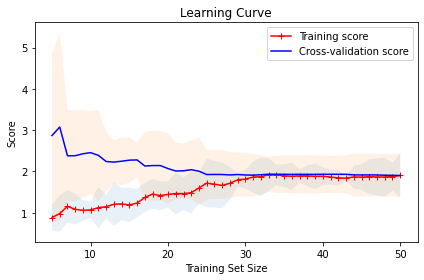

In [25]:
# instantiate
lg = LinearRegression()

# fit
lg.fit(X, y)

# Learning curve for Regression with RMSE as scoring parameter
train_sizes, train_scores, test_scores = learning_curve(lg, 
                                                        X, 
                                                        y, 
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # Number of folds in cross-validation
                                                        cv=2, 
                                                        # Evaluation metric
                                                        scoring = 'neg_mean_squared_error', 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(.1, 1.0, 50), 
                                                        verbose=0)

# Create means and standard deviations of training set scores
train_mean = np.sqrt(np.mean(np.absolute(train_scores), axis=1))
train_std = np.sqrt(np.std(np.absolute(train_scores), axis=1))

# Create means and standard deviations of test set scores
test_mean = np.sqrt(np.mean(np.absolute(test_scores), axis=1))
test_std =np.sqrt( np.std(np.absolute(test_scores), axis=1))

# Draw lines
plt.plot(train_sizes, train_mean,  "r-+",  label="Training score")
plt.plot(train_sizes, test_mean, "b-", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## Learning curves for classifiers

In [26]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, 
                                                            y,
                                                            # Number of folds in cross-validation
                                                            cv=cv,
                                                            # Evaluation metric
                                                            scoring='accuracy',
                                                            # Use all computer cores
                                                            n_jobs=n_jobs, 
                                                            # 50 different sizes of the training set
                                                            train_sizes=train_sizes)

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
    plt.plot(train_sizes, test_mean, color="g", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

    # Create plot
    plt.title(title)
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [27]:
from sklearn.model_selection import validation_curve
def plot_validation_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, param_range=None, param_name=None):

    # Create CV training and test scores for various training set sizes
    train_scores, test_scores = validation_curve(estimator, 
                                                X, 
                                                y,
                                                # Number of folds in cross-validation
                                                cv=cv,
                                                # Evaluation metric
                                                scoring='accuracy',
                                                # Name of the parameter that will be varied.
                                                param_name=param_name,
                                                # The values of the parameter that will be evaluated.  
                                                param_range=param_range)

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(param_range, train_mean, '--', color="r",  label="Training score")
    plt.plot(param_range, test_mean, color="g", label="Cross-validation score")

    # Draw bands
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.1)

    # Create plot
    plt.title(title)
    plt.xlabel("Parameter range"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.xscale('log')
    plt.show()

## Decision trees learning curves

In [28]:
dataset = pd.read_csv('./data/heart.csv')

In [29]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [30]:
dataset = pd.get_dummies(dataset, columns = categorical_features)

In [31]:
#Separate features and target 
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [32]:
X_scaled = X.copy()
standardScaler = StandardScaler()
X_scaled[continuous_features] = standardScaler.fit_transform(X[continuous_features])

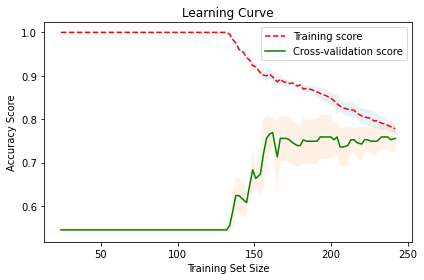

In [33]:
# Underfit model
# Train a decision tree with max_depth=2
tree_clf = DecisionTreeClassifier(max_depth=2)
plot_learning_curve(tree_clf, "Learning Curve", X_scaled, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 100))

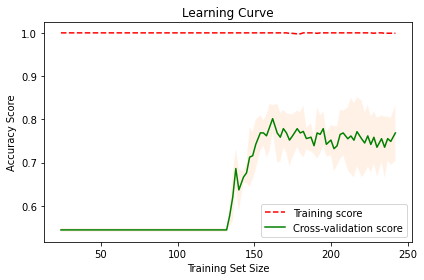

In [34]:
# Overfit model
# Train a decision tree with max_depth=10
tree_clf = DecisionTreeClassifier(max_depth=10)
plot_learning_curve(tree_clf, "Learning Curve", X_scaled, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 100))

## Random forests classifier learning curves

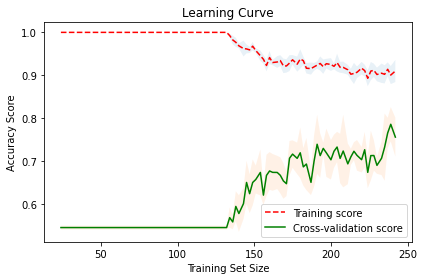

In [35]:
# Underfit
rnd_clf = RandomForestClassifier(n_estimators=2, max_features=4, n_jobs=-1)
plot_learning_curve(rnd_clf, "Learning Curve", X_scaled, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 100))

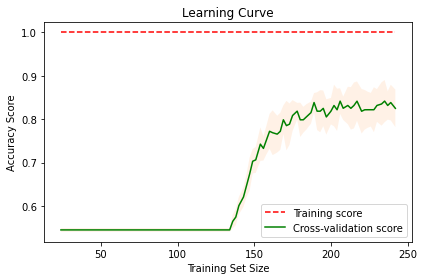

In [36]:
# Overfit
rnd_clf = RandomForestClassifier(n_estimators=100, max_features="auto", n_jobs=-1)
plot_learning_curve(rnd_clf, "Learning Curve", X_scaled, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 100))

## SVM

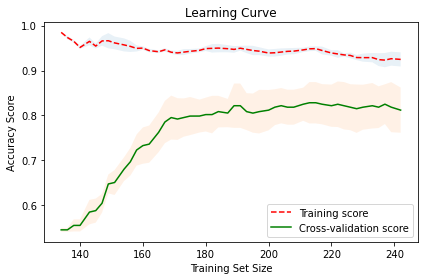

In [37]:
# Underfit model
# A typical situation: for a small amounts of data, errors between training and cross-validation sets are quite different, indicating overfitting. For that same model but with a large amount of data, errors "converge", indicating underfitting.
svm_clf = SVC(C=1)
plot_learning_curve(svm_clf, "Learning Curve", X_scaled, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 100))

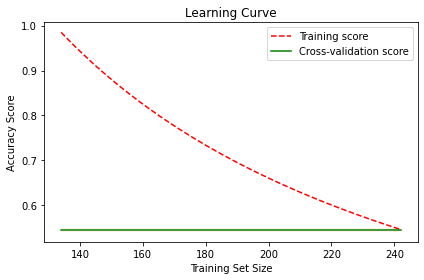

In [38]:
# Overfit to  Underfit model
svm_clf = SVC(C=0.000001)
plot_learning_curve(svm_clf, "Learning Curve", X_scaled, y, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 100))

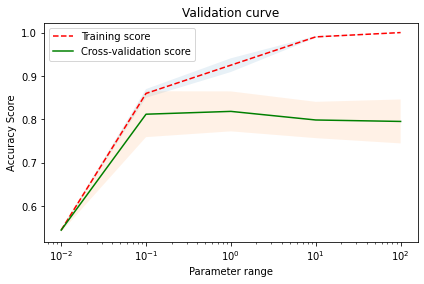

In [39]:

param_range = np.logspace(-2, 2, 5)
plot_validation_curve(svm_clf, "Validation curve", X_scaled, y, cv=5, n_jobs=-1, param_range=param_range, param_name='C')


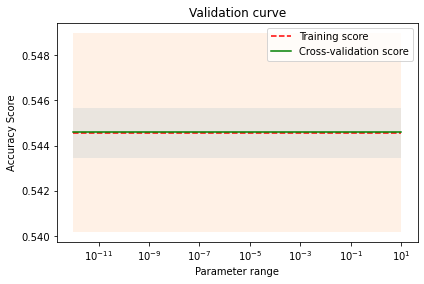

In [40]:
params = np.logspace(-12, 1, 11)
plot_validation_curve(svm_clf, "Validation curve", X_scaled, y, cv=5, n_jobs=-1, param_range=params, param_name="gamma")

This dataset is too smal to study SVM algorithm, I'll give you here another example

In [41]:
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
import pandas as pd 
import numpy as np

cancer = load_breast_cancer() 

# The data set is presented in a dictionary form: 
print(cancer.keys()) 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [42]:
df_feat = pd.DataFrame(cancer['data'], 
                       columns = cancer['feature_names']) 
  
# cancer column is our target 
df_target = pd.DataFrame(cancer['target'],  
                     columns =['Cancer']) 
df_feat.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [43]:
df_feat.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [44]:
standardScaler = StandardScaler()
X_scaled = standardScaler.fit_transform(df_feat)
y = np.ravel(df_target)

In [45]:
from sklearn.model_selection import train_test_split 
  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size = 0.30, random_state = 101) 

In [46]:
# train the model on train set 
model = SVC() 
model.fit(X_train, y_train) 
  
# print prediction results 
predictions = model.predict(X_test) 

In [47]:
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        66
           1       0.97      0.99      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [48]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.001, 0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 3/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.962 total time=   0.0s
[CV 5/5] END ...C=0.001, gamma=1, kernel=linear;, score=0.949 total time=   0.0s
[CV 1/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.001, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .C=0.001, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [49]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


In [50]:
grid_predictions = grid.predict(X_test) 

# print classification report 
print(classification_report(y_test, grid_predictions)) 


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        66
           1       0.96      1.00      0.98       105

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



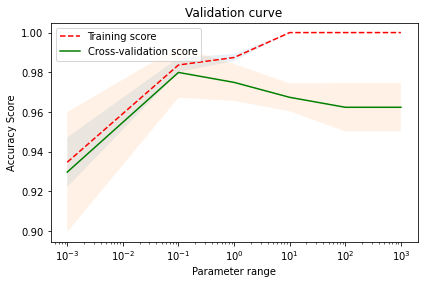

In [53]:
svm_clf = SVC(kernel='linear') 
param_range = [0.001, 0.1, 1, 10, 100, 1000]
plot_validation_curve(svm_clf, "Validation curve", X_train, y_train, cv=3, n_jobs=-1, param_range=param_range, param_name='C')